In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("C:/Users/admin/Downloads/hyderabad.csv")


In [3]:
pd.set_option('display.max_columns', None)
df_train.select_dtypes('object')

,PROP_ID,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,FEATURES,REGISTER_DATE,CLASS,RES_COM,PROP_NAME,VERIFIED,MAP_DETAILS,AMENITIES,ALT_TAG,PRODUCT_TYPE,TOP_USPS,EXPIRY_DATE,AREA,SECONDARY_AREA,PRICE,PROP_HEADING,VALUE_LABEL,CLASS_HEADING,CLASS_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SECONDARY_TAGS,FORMATTED_LANDMARK_DETAILS,SOCIETY_NAME,BUILDING_NAME,location,FLOOR_NUM
0,Z70135726,S,"Hmda, rera approved residential apartments at ...",Residential Apartment,Secunderabad,"23,24,5,17,6,20,21","08th Jul, 2023",A,R,Evolve,N,"{'LATITUDE': '17.575957', 'LONGITUDE': '78.471...","5,17,20,21,23,24,6","₹69.25 Lac, 2 bhk Residential Apartment in Gun...",PREMIUM_LISTING,NaN,2023-09-06 00:00:00,1215 sq.ft.,112.88 sq.m.,69.25 L,2 BHK Flat in Gundlapochampalli,Freehold,Dealer: Rainbow Developers,Dealer,2023-07-08 22:01:14,1 month ago,['FEATURED'],"['READY TO MOVE', 'RESALE']",[{'text': '1 Library'}],Evolve,Evolve,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '...",2
1,A68489968,S,Own a 2 BHK apartment in Annes Fortune Greenho...,Residential Apartment,Hyderabad,N,"12th Apr, 2023",B,R,Annes Fortune Greenhomes Swan,N,"{'LATITUDE': '17.522103', 'LONGITUDE': '78.384...",NaN,Annes Fortune Greenhomes Swan Others,PSEUDO_LISTING,NaN,2023-10-09 00:00:00,1155-1395 sq.ft.,107.3-129.6 sq.m.,69.3 - 83.7 L,2 BHK Flat in Nizampet,Freehold,Builder,Builder,2023-04-12 11:49:40,4 months ago,['FEATURED'],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']","[{'text': '1 Shopping'}, {'text': '3 Religious...",Annes Fortune Greenhomes Swan,Annes Fortune Greenhomes Swan,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",1
2,M69555358,S,This well-known project offers 4 BHK apartment...,Residential Apartment,Hyderabad,N,"08th Jun, 2023",B,R,The Olympus,N,"{'LATITUDE': '17.41977', 'LONGITUDE': '78.34969'}",NaN,The Olympus Others,PSEUDO_LISTING,NaN,2023-12-05 00:00:00,2880-3000 sq.ft.,267.56-278.71 sq.m.,Price on Request,4 BHK Flat in Nanakramguda,Freehold,Builder,Builder,2023-06-08 17:30:28,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']","[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",1
3,P69555352,S,Enjoy a blissful living experience in The Olym...,Residential Apartment,Hyderabad,N,"08th Jun, 2023",B,R,The Olympus,N,"{'LATITUDE': '17.41977', 'LONGITUDE': '78.34969'}",NaN,The Olympus Others,PSEUDO_LISTING,NaN,2023-12-05 00:00:00,2010-2020 sq.ft.,186.74-187.66 sq.m.,2.02 - 2.02 Cr,3 BHK Flat in Nanakramguda,Freehold,Builder,Builder,2023-06-08 17:30:27,2 months ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']","[{'text': '1 Metro Station'}, {'text': '1 Shop...",The Olympus,The Olympus,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",1
4,B70237806,S,Siva sai infra myra is a residential developme...,Independent House/Villa,Hyderabad,N,"14th Jul, 2023",B,R,Siva Sai Infra Myra,N,"{'LATITUDE': '17.513816', 'LONGITUDE': '78.244...",NaN,Siva Sai Infra Myra Others,PSEUDO_LISTING,NaN,2024-01-10 00:00:00,2688-3192 sq.ft.,249.72-296.55 sq.m.,2.42 - 2.87 Cr,3 Bedroom House in Kollur,Freehold,Builder,Builder,2023-07-14 16:16:56,1 month ago,[],"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']","[{'text': '2 Connectivities'}, {'text': '1 Edu...",Siva Sai Infra Myra,Siva Sai Infra Myra,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,X68337058,S,North and east facing approved open plots avai...,Residential Land,Hyderabad,"23,24,26,5","27th Jun, 2023",A,R,NaN,N,"{'LATITUDE': '17.4639176', 'LONGITUDE': '78.62...","5,23,24,26","₹31.73 Lac, Land/Plot in Ghatkesar - Land",PREMIUM_LISTING,"['East Facing', 'Overlooking Park/Garden', 'Ov...",2023-08-26 00:00:00,1503 sq.ft.,139.63 sq.m.,31.73 L,Residential land / Plot in Ghatkesar,Freehold,Dealer: Banusai Properties,Dealer,2023-06-27 13:25:04,2 months ago,[],"['EAST FACING', 'AUTHORITY APPROVED', 

In [4]:
drop_cols=["SPID","PROP_ID","DESCRIPTION","FEATURES","REGISTER_DATE","CLASS","PROP_NAME","REGISTER_DATE__U","REGISTERED_DAYS","SOCIETY_NAME","BUILDING_NAME","AMENITIES","ALT_TAG","PRODUCT_TYPE","EXPIRY_DATE","PROP_HEADING","CLASS_HEADING","PRIMARY_TAGS",'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','TRANSACT_TYPE','POSTING_DATE','FURNISH', 'FACING','PROJ_ID','BUILDING_ID', 'VERIFIED', 'PROPERTY_TYPE__U', 'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT','SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT','SECONDARY_TAGS','TOTAL_LANDMARK_COUNT','FORMATTED_LANDMARK_DETAILS']
df_train = df_train.drop(columns = drop_cols)


In [5]:
df_train.columns


Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'OWNTYPE', 'BEDROOM_NUM',
       'PRICE_PER_UNIT_AREA', 'AGE', 'TOTAL_FLOOR', 'UPDATE_DATE', 'RES_COM',
       'PROPERTY_NUMBER', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT',
       'MAP_DETAILS', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'TOP_USPS', 'AREA',
       'SECONDARY_AREA', 'PRICE', 'VALUE_LABEL', 'CLASS_LABEL', 'location',
       'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

In [6]:
df_train

,PREFERENCE,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,PRICE_PER_UNIT_AREA,AGE,TOTAL_FLOOR,UPDATE_DATE,RES_COM,PROPERTY_NUMBER,MIN_PRICE,MAX_PRICE,PRICE_SQFT,MAP_DETAILS,MIN_AREA_SQFT,MAX_AREA_SQFT,TOP_USPS,AREA,SECONDARY_AREA,PRICE,VALUE_LABEL,CLASS_LABEL,location,BALCONY_NUM,FLOOR_NUM
0,S,Residential Apartment,Secunderabad,1,2.0,5700.0,1,5.0,1689100520000,R,1,6925500,6925500,5700.0,"{'LATITUDE': '17.575957', 'LONGITUDE': '78.471...",112.877145,112.877145,NaN,1215 sq.ft.,112.88 sq.m.,69.25 L,Freehold,Dealer,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '...",1.0,2
1,S,Residential Apartment,Hyderabad,1,2.0,6000.0,5,20.0,1681280381000,R,8,6930000,8370000,6000.0,"{'LATITUDE': '17.522103', 'LONGITUDE': '78.384...",107.302965,129.599685,NaN,1155-1395 sq.ft.,107.3-129.6 sq.m.,69.3 - 83.7 L,Freehold,Builder,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
2,S,Residential Apartment,Hyderabad,1,4.0,0.0,5,20.0,1686225628000,R,2,0,0,0.0,"{'LATITUDE': '17.41977', 'LONGITUDE': '78.34969'}",267.560640,278.709000,NaN,2880-3000 sq.ft.,267.56-278.71 sq.m.,Price on Request,Freehold,Builder,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
3,S,Residential Apartment,Hyderabad,1,3.0,20049.0,5,20.0,1686225627000,R,2,20200000,20200000,20049.0,"{'LATITUDE': '17.41977', 'LONGITUDE': '78.34969'}",186.735030,187.664060,NaN,2010-2020 sq.ft.,186.74-187.66 sq.m.,2.02 - 2.02 Cr,Freehold,Builder,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,1
4,S,Independent House/Villa,Hyderabad,1,3.0,8999.0,5,0.0,1689331617000,R,4,24192000,28728000,8999.0,"{'LATITUDE': '17.513816', 'LONGITUDE': '78.244...",249.723264,296.546376,NaN,2688-3192 sq.ft.,249.72-296.55 sq.m.,2.42 - 2.87 Cr,Freehold,Builder,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,S,Residential Land,Hyderabad,1,NaN,19000.0,0,NaN,1687852504000,R,1,3173000,3173000,19000.0,"{'LATITUDE': '17.4639176', 'LONGITUDE': '78.62...",139.633209,139.633209,"['East Facing', 'Overlooking Park/Garden', 'Ov...",1503 sq.ft.,139.63 sq.m.,31.73 L,Freehold,Dealer,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN
9483,S,Residential Land,Hyderabad,1,NaN,11000.0,0,NaN,1687852513000,R,1,3300000,3300000,11000.0,"{'LATITUDE': '16.985875', 'LONGITUDE': '78.499...",250.838100,250.838100,"['East Facing', 'Overlooking Park/Garden', 'Ov...",2700 sq.ft.,250.84 sq.m.,33 L,Freehold,Dealer,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",NaN,NaN
9484,R,Independent/Builder Floor,Secunderabad,0,2.0,15.0,1,3.0,1691679461000,R,1,15000,15000,15.0,"{'LATITUDE': '17.4653875', 'LONGITUDE': '78.47...",92.903000,92.903000,NaN,1000 sq.ft.,92.9 sq.m.,"15,000",NaN,Dealer,"{'CITY': '268', 'CITY_NAME': 'Secunderabad', '...",1.0,1
9485,S,Residential Apartment,Hyderabad,1,3.0,6400.0,5,5.0,1692345025000,R,1,10240000,10240000,6400.0,"{'LATITUDE': '17.47078', 'LONGITUDE': '78.30668'}",148.644800,148.644800,"['East Facing', 'The Indian Public School Nea...",1600 sq.ft.,148.64 sq.m.,1.02 Cr,Freehold,Dealer,"{'CITY': '269', 'CITY_NAME': 'Hyderabad', 'BUI...",2.0,4


In [7]:
#sorting
df = df_train.sort_values(by='PRICE_SQFT', ascending=True)

In [8]:
check1 = int(len(df) * 0.3)  
check2 = int(len(df) * 0.2) 

In [9]:
#data Split

split1 = df.iloc[:check1]
split2= df.iloc[check1:check1+check2]
split3 = df.iloc[check1+check2:]

len1=len(split1)
len2=len(split2)
len3=len(split3)

In [10]:
#bus_stop_distance:

random_values = np.random.randint(10,25, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'bus_stop_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,15, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'bus_stop_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,6, size=len3)  
# Assign the random values to the particular column
column_name = 'bus_stop_distance'  
split3[column_name] = random_values




In [11]:
#railway_distance:

random_values = np.random.randint(80,150, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'railway_distance'  
split1[column_name] = random_values

random_values = np.random.randint(25,85, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'railway_distance'  
split2[column_name] = random_values

random_values = np.random.randint(10,25, size=len3)  
# Assign the random values to the particular column
column_name = 'railway_distance'  
split3[column_name] = random_values


In [12]:
#bank_distance

random_values = np.random.randint(10,25, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'bank_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'bank_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,6, size=len3)  
# Assign the random values to the particular column
column_name = 'bank_distance'  
split3[column_name] = random_values

In [13]:
#school_distance

random_values = np.random.randint(25,40, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'school_distance'  
split1[column_name] = random_values

random_values = np.random.randint(10,25, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'school_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,10, size=len3)  
# Assign the random values to the particular column
column_name = 'school_distance'  
split3[column_name] = random_values

In [14]:
#hospital_distance

random_values = np.random.randint(25,30, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'hospital_distance'  
split1[column_name] = random_values

random_values = np.random.randint(10,25, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'hospital_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,10, size=len3)  
# Assign the random values to the particular column
column_name = 'hospital_distance'  
split3[column_name] = random_values

In [15]:
#petrol_bunk_distance

random_values = np.random.randint(10,50, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'petrol_bunk_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'petrol_bunk_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,5, size=len3)  
# Assign the random values to the particular column
column_name = 'petrol_bunk_distance'  
split3[column_name] = random_values

In [16]:
#parks_distance

random_values = np.random.randint(10,50, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'parks_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'parks_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,5, size=len3)  
# Assign the random values to the particular column
column_name = 'parks_distance'  
split3[column_name] = random_values

In [17]:
#hotel_distance

random_values = np.random.randint(10,100, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'hotel_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'hotel_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,5, size=len3)  
# Assign the random values to the particular column
column_name = 'hotel_distance'  
split3[column_name] = random_values

In [18]:
#schools_distance

random_values = np.random.randint(10,100, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'schools_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'schools_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,5, size=len3)  
# Assign the random values to the particular column
column_name = 'schools_distance'  
split3[column_name] = random_values

In [19]:
#college_distance

random_values = np.random.randint(10,100, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'college_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'college_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,10, size=len3)  
# Assign the random values to the particular column
column_name = 'college_distance'  
split3[column_name] = random_values

In [20]:
#highway_distance

random_values = np.random.randint(10,100, size=len1)    
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'highway_distance'  
split1[column_name] = random_values

random_values = np.random.randint(5,10, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'highway_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,10, size=len3)  
# Assign the random values to the particular column
column_name = 'highway_distance'  
split3[column_name] = random_values

In [21]:
#police_station_distance

random_values = np.random.randint(80,150, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'police_station_distance'  
split1[column_name] = random_values

random_values = np.random.randint(25,85, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'police_station_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,25, size=len3)  
# Assign the random values to the particular column
column_name = 'police_station_distance'  
split3[column_name] = random_values

In [22]:
#bank_distance

random_values = np.random.randint(80,150, size=len1)  
# Assign the random values to the particular column
# split1.reset_index(drop=True, inplace=True)
column_name = 'bank_distance'  
split1[column_name] = random_values

random_values = np.random.randint(25,85, size=len2)  
# Assign the random values to the particular column
split2.reset_index(drop=True)#, inplace=True)
column_name = 'bank_distance'  
split2[column_name] = random_values

random_values = np.random.randint(0,25, size=len3)  
# Assign the random values to the particular column
column_name = 'bank_distance'  
split3[column_name] = random_values

In [23]:
#merging

df = pd.concat([split1, split2, split3], axis=0)

df.reset_index(drop=True, inplace=True)

print(df)

     PREFERENCE            PROPERTY_TYPE       CITY  OWNTYPE  BEDROOM_NUM  \
0             S    Residential Apartment  Hyderabad        1          2.0   
1             S         Residential Land  Hyderabad        1          NaN   
2             S    Residential Apartment  Hyderabad        1          3.0   
3             S    Residential Apartment  Hyderabad        1          4.0   
4             S    Residential Apartment  Hyderabad        1          3.0   
...         ...                      ...        ...      ...          ...   
9482          S  Independent House/Villa  Hyderabad        1          3.0   
9483          S         Residential Land  Hyderabad        1          NaN   
9484          S         Residential Land  Hyderabad        1          NaN   
9485          S         Residential Land  Hyderabad        1          NaN   
9486          S         Residential Land  Hyderabad        1          NaN   

      PRICE_PER_UNIT_AREA  AGE  TOTAL_FLOOR    UPDATE_DATE RES_COM  \
0    

In [24]:
df_train=df


### Missing values

In [25]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()*100/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FLOOR_NUM,4468,47.096026
TOP_USPS,4115,43.375145
BALCONY_NUM,3293,34.710657
BEDROOM_NUM,2814,29.661642
VALUE_LABEL,1560,16.443554
TOTAL_FLOOR,576,6.071466
PREFERENCE,0,0.000000
bank_distance,0,0.000000
location,0,0.000000
bus_stop_distance,0,0.000000


In [26]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)
df_train.isnull().sum().max()

0

In [27]:
df_train.columns.tolist()

['PREFERENCE',
 'PROPERTY_TYPE',
 'CITY',
 'OWNTYPE',
 'PRICE_PER_UNIT_AREA',
 'AGE',
 'UPDATE_DATE',
 'RES_COM',
 'PROPERTY_NUMBER',
 'MIN_PRICE',
 'MAX_PRICE',
 'PRICE_SQFT',
 'MAP_DETAILS',
 'MIN_AREA_SQFT',
 'MAX_AREA_SQFT',
 'AREA',
 'SECONDARY_AREA',
 'PRICE',
 'CLASS_LABEL',
 'location',
 'bus_stop_distance',
 'railway_distance',
 'bank_distance',
 'school_distance',
 'hospital_distance',
 'petrol_bunk_distance',
 'parks_distance',
 'hotel_distance',
 'schools_distance',
 'college_distance',
 'highway_distance',
 'police_station_distance']

In [28]:
X_num = df_train.select_dtypes(exclude='object')
X_cat = df_train.select_dtypes(include='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = X_cat.apply(label_encoder.fit_transform)
X_cat=encoded_labels
print(X_cat.dtypes)
print(encoded_labels.columns)
print(X_num.dtypes)

PREFERENCE        int32
PROPERTY_TYPE     int32
CITY              int32
RES_COM           int32
MAP_DETAILS       int32
AREA              int32
SECONDARY_AREA    int32
PRICE             int32
CLASS_LABEL       int32
location          int32
dtype: object
Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'RES_COM', 'MAP_DETAILS', 'AREA',
       'SECONDARY_AREA', 'PRICE', 'CLASS_LABEL', 'location'],
      dtype='object')
OWNTYPE                      int64
PRICE_PER_UNIT_AREA        float64
AGE                          int64
UPDATE_DATE                  int64
PROPERTY_NUMBER              int64
MIN_PRICE                    int64
MAX_PRICE                    int64
PRICE_SQFT                 float64
MIN_AREA_SQFT              float64
MAX_AREA_SQFT              float64
bus_stop_distance            int32
railway_distance             int32
bank_distance                int32
school_distance              int32
hospital_distance            int32
petrol_bunk_distance         int32
parks_distance        

In [30]:
df_train = X_num.join(X_cat)

# Modeling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X = df_train.drop(['PRICE'],axis=1)
y = df_train['PRICE']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [35]:
param_grid =   {
    'n_estimators' : [1000, 10000],  
    'boosting_type': ['gbdt'],
    'num_leaves': [30, 35],
    #'learning_rate': [0.01, 0.02, 0.05],
    #'colsample_bytree': [0.8, 0.95 ],
    'subsample': [0.8, 0.95],
    'is_unbalance': [True, False],
    #'reg_alpha'  : [0.01, 0.02, 0.05],
    #'reg_lambda' : [0.01, 0.02, 0.05],
    'min_split_gain' :[0.01, 0.02, 0.05]
    }

In [36]:
# from xgboost import XGBRegressor
model = XGBRegressor(learning_rate=0.09,n_estimators = 200,min_child_weight = 1, subsample = 0.9, max_depth=10, colsample_bytree
= 0.8,reg_lambda = 0, reg_alpha = 0, gamma = 0.2,objective="reg:squarederror", eval_metric="rmse")
# , early_stopping_rounds=10

In [37]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:

y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Absolute Error: 18.717677071150298
Mean Squared Error: 11067.084402078206
Root Mean Squared Error: 105.2002110362817
R2 Score: 0.9777406170177699


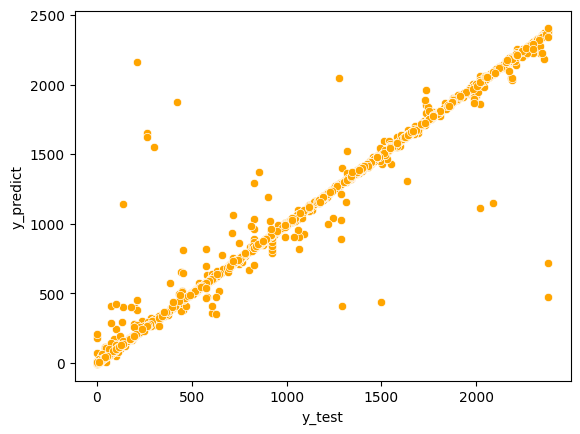

In [39]:
residuals = y_test-y_pred
sns.scatterplot(x=y_test, y=y_pred, color='orange')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.savefig("output1.jpg", dpi=100)
plt.show()

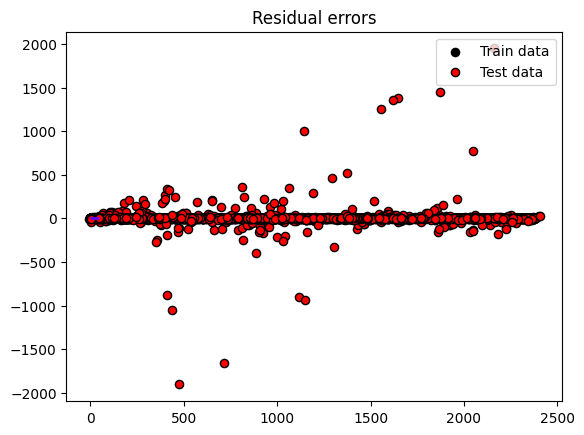

In [40]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = "black", s = 35, edgecolor='black', label = 'Train data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color = "red", s = 35, edgecolor='black', label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, colors='#5e03fc', linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.savefig("output2.jpg", dpi=100)
plt.show()

In [41]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)